# Exploring the Digits Dataset
### In this notebook, you will explore the digits dataset using
### multiple models.
### Follow the comments and markdown cells. Some of the code has been put in for you.
*Note that your output and scores might not be exactly the same as mine, if your random splits are not the same*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

# Decision Tree
## Classify the digits dataset using decision trees

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state= 42)


In [5]:
#instatiate a Decision Tree CLassifier (call it dt so that the code below runs!)
dt = DecisionTreeClassifier()
#fit to the training data
dt.fit(Xtrain, ytrain)
#get the train predictions
y_train_pred = dt.predict(Xtrain)
#get the test predictions
y_test_pred = dt.predict(Xtest)

In [8]:
#print the accuracy score and the confusion matrix of ytest
print(accuracy_score(ytrain, y_train_pred))
confusion_matrix(ytrain, y_train_pred)

1.0


array([[135,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 145,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 139,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 137,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 126,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 123,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 136,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 138,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 136,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 132]])

In [9]:
#run the following code to see a text representation of the tree
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_36 <= 0.50
|   |--- feature_42 <= 5.00
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_4 <= 8.00
|   |   |   |   |--- feature_52 <= 6.00
|   |   |   |   |   |--- class: 9
|   |   |   |   |--- feature_52 >  6.00
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_4 >  8.00
|   |   |   |   |--- class: 5
|   |   |--- feature_21 >  6.50
|   |   |   |--- feature_33 <= 1.50
|   |   |   |   |--- feature_9 <= 10.50
|   |   |   |   |   |--- class: 9
|   |   |   |   |--- feature_9 >  10.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- feature_33 >  1.50
|   |   |   |   |--- class: 5
|   |--- feature_42 >  5.00
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_3 <= 4.50
|   |   |   |   |--- class: 4
|   |   |   |--- feature_3 >  4.50
|   |   |   |   |--- feature_5 <= 10.50
|   |   |   |   |   |--- feature_50 <= 14.00
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_50 >  14.00
|   |   |   |   |   |   |--- feature_26 <= 9.50
|   |   | 

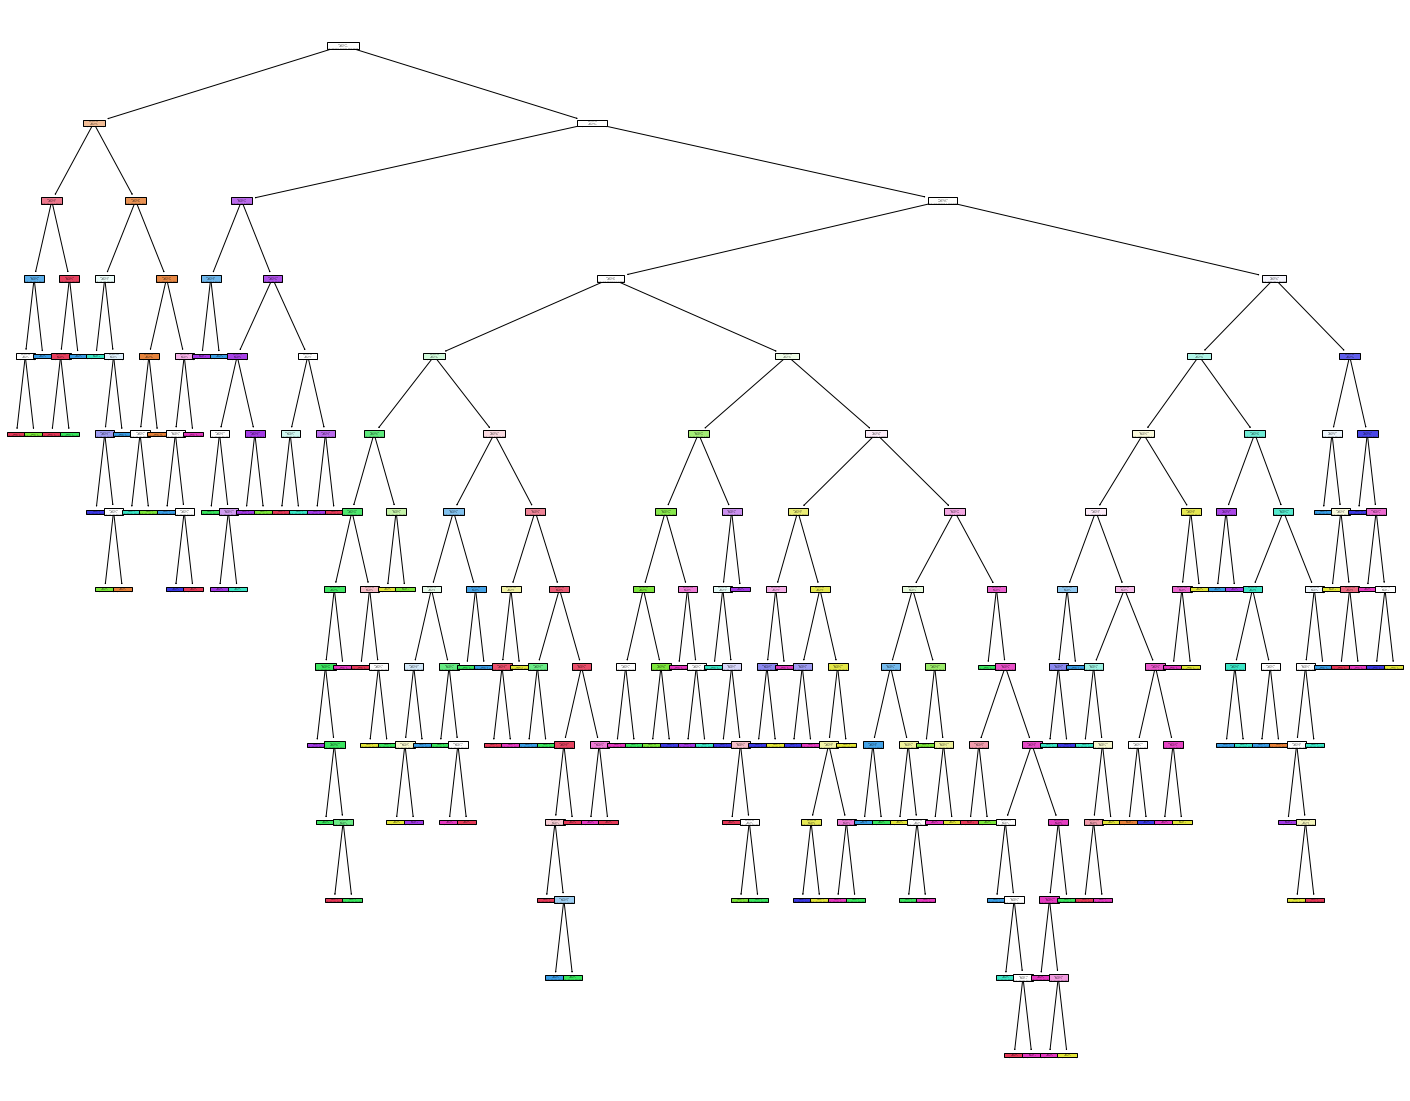

In [10]:
#run the following code to see the tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=digits.feature_names, filled=True)

# Random Forest

In [11]:
#use random forest classifier on the digits dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
#instantiate the RandomForestClassifier model
rfc = RandomForestClassifier()
#fit the model to the training data
rfc.fit(Xtrain, ytrain)
#predict to get the prediction values for the test set
ypred = rfc.predict(Xtest)

In [13]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#print the confusion matrix for the Random Forest Predictions
confusion_matrix(ytest, ypred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 41,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 45]])

In [14]:
from sklearn import metrics
#print the classification report
print(metrics.classification_report(ypred, ytest))  #YOUR RESULTS MAY BE DIFFERENT BECAUSE OF RANDOMNESS

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      1.00      1.00        43
           2       0.93      1.00      0.96        41
           3       0.98      0.92      0.95        48
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.98      0.99        49
           8       0.96      0.98      0.97        47
           9       0.96      0.96      0.96        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

